# Python Workbook 1: What are the characteristics in the number of jobs by census block?

In these workbooks, we will start with a motivating question, then walk through the process we need to go through in order to answer the motivating question. Along the way, we will walk through various Python commands and develop skills as we work towards answering the question.

As you work, there will be headers that are in **<span style="color:green">GREEN</span>**. These indicate locations where there is an accompanying video. This video may walk through the steps or expand on the topics discussed in that section. Though it isn't absolutely necessary to watch the video while working through this notebook, we highly recommend watching them at least once on your first time through.

**<span style="color:green">If you have not yet watched the "Introduction to Jupyter Notebooks" video, watch it before you proceed!</span>**

You will also run into some headers that are in **<span style="color:red">RED</span>**. These headers indicate a checkpoint to practice writing the code yourself. You should stop at these checkpoints and try doing the exercises and answering the questions posed in these sections.

**NOTE: When you open a notebook, make sure you run each cell containing code from the beginning. Since the code we're writing builds on everything written before, if you don't make sure to run everything from the beginning, some things may not work.**

In each of the workbooks, we will start out with a motivating question. Here, we'll introduce the data that we'll work with, which will lead into our motivating question for this workbook.

## Longitudinal Employer-Household Dynamics (LEHD) Data

In these workbooks, we will be using LEHD data. These are public-use data sets containing information about employers and employees. Information about the LEHD Data can be found at [https://lehd.ces.census.gov/](https://lehd.ces.census.gov/). 

We will be using the LEHD Origin-Destination Employment Statistics (LODES) datasets in our applications in this workbook. Each state has three main types of files: Origin-Destination data, in which job totals are associated with a home and work Census block pair, Residence Area Characteristic data, in which job totals are by home Census block, and Workplace Area Characteristic data, in which job totals are by workplace Census block. In addition to these three, there is a "geographic crosswalk" file with descriptions of the Census Blocks as they appear the in the LODES datasets.

You can find more information about the LODES datasets at:

[https://lehd.ces.census.gov/data/lodes/LODES7/LODESTechDoc7.3.pdf](https://lehd.ces.census.gov/data/lodes/LODES7/LODESTechDoc7.3.pdf). 

**Understanding how these datasets are structured is crucial to being able to successfully gain insight into the data, so make sure you take some time to read through the documentation and get familiar with what you're working with!**

In these examples, I will use data from California with "All Segments" and "All Jobs." At the checkpoints, I highly encourage you to think about what questions might be interesting and try downloading other data to use so you can get more practice. You can download the LEHD data [here](https://lehd.ces.census.gov/data/lodes/LODES7/). The documentation above details how to find the appropriate dataset.

## Starting Out: Introduction to Python

In order to try to answer these questions, we'll write code to bring in datasets, manipulate these datasets, and summarize datasets using Python. Python is a popular general-purpose programming language that has seen a rise in use for data analysis. As of 2017, Python is near or at the top in terms of popularity in programming languages for data analysis (see [the kdnuggets post](https://www.kdnuggets.com/2017/05/poll-analytics-data-science-machine-learning-software-leaders.html) or [a look at multiple surveys](http://makemeanalyst.com/most-popular-languages-for-data-science-and-analytics-2017/)).

In addition, unlike other tools for statistical analysis, like Excel or Stata, Python is designed to be general-purpose. This means that we aren't limited to only doing certain statistical analyses and gives us much more flexibility in what we can do. 

As we walk through the steps below, make sure you run each code cell! You can highlight the code cell and use `Shift` + `Enter` to run it. You can feel free to add additional cells to run your own code along the way, but you should also run the code that we've provided to see how it works. 

## <span style="color:green">Motivating Question (VIDEO)</span>

The dataset we'll be working with in this workbook is the Workplace Area Characteristics data, which aggregates job totals by workplace census block. We want to explore this dataset and get a better idea of the distribution of jobs. That is, we want to answer the following questions:

**How can we characterize the number of jobs in the state? What can we say about the distribution of the number of jobs by census block? What are distributions of jobs by different categories, such as age group or industry?**

As you work through this notebook, we'll work towards answering these questions, so try to keep them in mind. 

## Loading Libraries

We first load a few libraries. These libraries are essentially bundles of useful tools that can help us do specific tasks. In this case, we're going to be bringing in NumPy and Pandas, which are specifically useful for computing and data analysis. Don't worry too much about the specifics of libraries for now, just that we need to include the first few lines of code below if we want to use many of the tools described in this workbook. 

If you'd like to read more about the libraries that we're loading here, see the following links: for [NumPy](http://www.numpy.org/) and for [Pandas](http://pandas-docs.github.io/pandas-docs-travis/)

In [3]:
# First, we import packages
# Note that everything after a "#" in Python will be ignored, so you can use it to write comments
import numpy as np # NumPy (Numerical Python) for scientific computing
import pandas as pd # Pandas, for data analysis tools 

Notice that we loaded the libraries with aliases (e.g. `as np`). This is just to make it easier to use them later on. Whenever you see `np`, read it as `numpy`. The same goes for `pd` and `pandas`. 

## <span style="color:green">Reading in the Data Set (VIDEO)</span>
We'll start by reading in a data set from a csv, or comma-separated value, file. For our examples, we'll use the Workplace Area Characteristic (WAC) data from California. 

We use the `read_csv` function from pandas to read in the csv file. Note that you need to have the `ca_wac_S000_JT00_2015.csv` file in the same folder as this notebook for the code below to run. If you haven't downloaded it from the course site, make sure you do so first! You'll also need to make sure to unzip the file and make sure it's in the same folder as this notebook.

In [4]:
data_file = 'ca_wac_S000_JT00_2015.csv'
df = pd.read_csv(data_file)

# We can also use the following line by itself instead
# df = pd.read_csv('ca_wac_S000_JT00_2015.csv')

Let's break the code down. In the first line, we assign `'ca_wac_main_JT00_2015.csv'` to the variable `data_file`. Note that any text inside quotation marks, such as `'ca_wac_main_JT00_2015.csv'`, is a string, which makes `data_file` a string variable. Note that this by itself doesn't really do anything fancy. We are just setting up a string variable with the text, `'ca_wac_S000_JT00_2015.csv'`, not telling Python to look for a file with that name or anything like that yet.

To look at what we've stored inside `data_file`, try using the `print` function with `data_file` as the argument. What do you think the output will be?

In [5]:
print(data_file)

ca_wac_S000_JT00_2015.csv


In the second line, we're using the `read_csv()` function from the `pandas` package. Notice that we had to include `pd.` in front of the function. This tells Python to use the `read_csv` function that is inside the `pandas` package. The function `read_csv()` outputs a Data Frame, which is then assigned to the variable `df`. This means that our data is now in a data frame called `df`.

> #### Side Note: File Location
> We only used the file name for `data_file`. This is because we included the CSV file in the same folder as this notebook. If it were somewhere else, we'd have to include the file path (e.g. `"/Documents/Python/ca_wac_S000_JT00_2015.csv"`). If you don't know much about how file paths work, don't worry: you just need to make sure that the file is in the same folder as the notebook.

Lastly, we've included a line of code that can load the csv file into `df` in one line. This does the exact same thing as the first two lines of code, with the exception of not assigning `'ca_wac_main_JT00_2015.csv'` to `data_file`. Notice that all we did was replace `data_file` with the string that we assigned to `data_file`. It is commented out, but feel free to try running it by itself (commenting out the first two lines) to check that it does the same thing.

## A Note on Data Types

We've mentioned that `data_file` is a string variable and that `df` is a pandas Data Frame. These are different variable types, and it's important to keep this in mind because the type of variable dictates what you can do with it. 

In [6]:
type(data_file)

str

Since `data_file` is a string, the `type` function returns `str` (which stands for string). Let's look at `df`. What do you think the output will be?

In [7]:
type(df)

pandas.core.frame.DataFrame

It tells us that `df` is a pandas Data Frame. As we'll see later on, a Pandas Data Frame, as with other Python objects, has specific attributes and functions that you can use with it. 

## <span style="color:red">Checkpoint 1: Read in Your Data</span>

Try using what you've learned to read in another dataset from a different state. Use the link below:

[LODES Data](https://lehd.ces.census.gov/data/lodes/LODES7)

and navigate to the state you want. You'll need to download the appropriate dataset and save it in the same place as this notebook. Check out the [LODES documentation](https://lehd.ces.census.gov/data/lodes/LODES7/LODESTechDoc7.3.pdf) for more information on which file is the right one.

Make sure you assign it to a variable other than `df` so that you don't overwrite it (for example, if you choose Massachusetts, you might use `df_ma`). Play around with the few functions you've learned. 

In [8]:
df_ny = pd.read_csv('ny_wac_S000_JT00_2015.csv')
type(df_ny)

pandas.core.frame.DataFrame

## <span style="color:green">Exploring the Data Frame (VIDEO)</span>

Now that we've loaded in the data set as a Data Frame, let's check the number of rows and columns. We can do this by looking at the `shape` attribute of a data frame.

In [9]:
df.shape

(243462, 53)

It looks like there are 243,462 rows and 53 columns. In this particular dataset, the rows represent census blocks in California, and the columns are different workplace area characteristics about the census blocks (see pages 9 and 10 of the [LODES documentation file](https://lehd.ces.census.gov/data/lodes/LODES7/LODESTechDoc7.3.pdf)).

Let's also find out the names of all the variables in this data set. 

In [10]:
df.columns

Index(['w_geocode', 'C000', 'CA01', 'CA02', 'CA03', 'CE01', 'CE02', 'CE03',
       'CNS01', 'CNS02', 'CNS03', 'CNS04', 'CNS05', 'CNS06', 'CNS07', 'CNS08',
       'CNS09', 'CNS10', 'CNS11', 'CNS12', 'CNS13', 'CNS14', 'CNS15', 'CNS16',
       'CNS17', 'CNS18', 'CNS19', 'CNS20', 'CR01', 'CR02', 'CR03', 'CR04',
       'CR05', 'CR07', 'CT01', 'CT02', 'CD01', 'CD02', 'CD03', 'CD04', 'CS01',
       'CS02', 'CFA01', 'CFA02', 'CFA03', 'CFA04', 'CFA05', 'CFS01', 'CFS02',
       'CFS03', 'CFS04', 'CFS05', 'createdate'],
      dtype='object')

We can use the `head` and `tail` methods in order to look at the first or last few rows of the data frame. 

In [11]:
df.head() # Default is to show first 5 rows.

,w_geocode,C000,CA01,CA02,CA03,CE01,CE02,CE03,CNS01,CNS02,...,CFA02,CFA03,CFA04,CFA05,CFS01,CFS02,CFS03,CFS04,CFS05,createdate
0,60014001001007,30,2,16,12,4,2,24,0,0,...,0,0,0,0,0,0,0,0,0,20170919
1,60014001001008,4,0,1,3,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,20170919
2,60014001001011,3,2,1,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,20170919
3,60014001001017,11,3,3,5,2,2,7,0,0,...,0,0,0,0,0,0,0,0,0,20170919
4,60014001001024,10,3,3,4,7,1,2,0,0,...,0,0,0,0,0,0,0,0,0,20170919


In [12]:
df.head(15) # We can specify how many rows we want to see.

,w_geocode,C000,CA01,CA02,CA03,CE01,CE02,CE03,CNS01,CNS02,...,CFA02,CFA03,CFA04,CFA05,CFS01,CFS02,CFS03,CFS04,CFS05,createdate
0,60014001001007,30,2,16,12,4,2,24,0,0,...,0,0,0,0,0,0,0,0,0,20170919
1,60014001001008,4,0,1,3,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,20170919
2,60014001001011,3,2,1,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,20170919
3,60014001001017,11,3,3,5,2,2,7,0,0,...,0,0,0,0,0,0,0,0,0,20170919
4,60014001001024,10,3,3,4,7,1,2,0,0,...,0,0,0,0,0,0,0,0,0,20170919
5,60014001001026,3,0,2,1,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,20170919
6,60014001001027,13,3,3,7,4,5,4,0,0,...,0,0,0,0,0,0,0,0,0,20170919
7,60014001001032,13,2,4,7,3,2,8,0,0,...,0,0,0,0,0,0,0,0,0,20170919
8,60014001001033,2,0,0,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20170919
9,60014001001034,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20170919


In [13]:
df.tail(15) # Same as head, except the last 10 instead of first 10

,w_geocode,C000,CA01,CA02,CA03,CE01,CE02,CE03,CNS01,CNS02,...,CFA02,CFA03,CFA04,CFA05,CFS01,CFS02,CFS03,CFS04,CFS05,createdate
243447,61150411003025,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,20170919
243448,61150411003028,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20170919
243449,61150411003029,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20170919
243450,61150411003040,2,0,0,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20170919
243451,61150411003056,2,0,0,2,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,20170919
243452,61150411004001,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20170919
243453,61150411004011,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20170919
243454,61150411004020,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20170919
243455,61150411004025,3,0,0,3,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20170919
243456,61150411004027,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20170919


> #### Side Note: Instance variables and Methods
Note that we used `head()`, with parentheses, while we used just `shape` or `column`, without parentheses. This is because `shape` and `column` are **instance variables** and head is a **method**. To put it another way, `shape` and `columns` are variables that each Data Frame object has, and we're just displaying the values in those variables. On the other hand, `head` is a method, or a function that you perform specifically on a certain type of object (in this case, a Data Frame object).

### Accessing the Data Frame
What if we want to only look at certain cells, or certain columns? We can use a variety of commands to do just that.

To access individual columns, we can use square brackets or we can simply use dot notation. Suppose we wanted to look only at the total number of jobs in each of the census blocks.

In [14]:
# Look at just total number of jobs (C000)
df["C000"] 

# This does the same thing
df.C000 

0          30
1           4
2           3
3          11
4          10
5           3
6          13
7          13
8           2
9           1
10         14
11          3
12          1
13          9
14          3
15          1
16          2
17          1
18          1
19          7
20          1
21          2
22          3
23          1
24         25
25         72
26        595
27          2
28          6
29          1
         ... 
243432     19
243433      4
243434     44
243435     29
243436      4
243437      2
243438     14
243439      3
243440     37
243441      4
243442      1
243443     18
243444     19
243445     17
243446     27
243447      1
243448      1
243449      1
243450      2
243451      2
243452      1
243453      1
243454      1
243455      3
243456      1
243457      3
243458     18
243459     11
243460      8
243461     10
Name: C000, Length: 243462, dtype: int64

What if we want to get certain rows? We can also use `loc` with square brackets. We use a colon to indicate that we want a series of indices with a start and end. We can also leave one side of the colon empty to indicate that we want the rest of the values on that end.

In [15]:
# Show rows 10 - 20. Remember, the first row is row 0
df.loc[10:20] 

,w_geocode,C000,CA01,CA02,CA03,CE01,CE02,CE03,CNS01,CNS02,...,CFA02,CFA03,CFA04,CFA05,CFS01,CFS02,CFS03,CFS04,CFS05,createdate
10,60014001001036,14,2,9,3,3,5,6,0,0,...,0,0,0,0,0,0,0,0,0,20170919
11,60014001001038,3,0,0,3,0,0,3,0,0,...,0,0,0,0,0,0,0,0,0,20170919
12,60014001001041,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20170919
13,60014001001042,9,0,9,0,0,0,9,0,0,...,0,0,0,0,0,0,0,0,0,20170919
14,60014001001043,3,1,1,1,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,20170919
15,60014001001044,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,20170919
16,60014001001047,2,0,2,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,20170919
17,60014001001049,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20170919
18,60014001001053,1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,20170919
19,60014001001054,7,0,4,3,1,2,4,0,0,...,0,0,0,0,0,0,0,0,0,20170919


In [16]:
df.loc[:10]

,w_geocode,C000,CA01,CA02,CA03,CE01,CE02,CE03,CNS01,CNS02,...,CFA02,CFA03,CFA04,CFA05,CFS01,CFS02,CFS03,CFS04,CFS05,createdate
0,60014001001007,30,2,16,12,4,2,24,0,0,...,0,0,0,0,0,0,0,0,0,20170919
1,60014001001008,4,0,1,3,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,20170919
2,60014001001011,3,2,1,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,20170919
3,60014001001017,11,3,3,5,2,2,7,0,0,...,0,0,0,0,0,0,0,0,0,20170919
4,60014001001024,10,3,3,4,7,1,2,0,0,...,0,0,0,0,0,0,0,0,0,20170919
5,60014001001026,3,0,2,1,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,20170919
6,60014001001027,13,3,3,7,4,5,4,0,0,...,0,0,0,0,0,0,0,0,0,20170919
7,60014001001032,13,2,4,7,3,2,8,0,0,...,0,0,0,0,0,0,0,0,0,20170919
8,60014001001033,2,0,0,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20170919
9,60014001001034,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20170919


In [17]:
df.loc[:] # This gives all rows

,w_geocode,C000,CA01,CA02,CA03,CE01,CE02,CE03,CNS01,CNS02,...,CFA02,CFA03,CFA04,CFA05,CFS01,CFS02,CFS03,CFS04,CFS05,createdate
0,60014001001007,30,2,16,12,4,2,24,0,0,...,0,0,0,0,0,0,0,0,0,20170919
1,60014001001008,4,0,1,3,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,20170919
2,60014001001011,3,2,1,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,20170919
3,60014001001017,11,3,3,5,2,2,7,0,0,...,0,0,0,0,0,0,0,0,0,20170919
4,60014001001024,10,3,3,4,7,1,2,0,0,...,0,0,0,0,0,0,0,0,0,20170919
5,60014001001026,3,0,2,1,0,2,1,0,0,...,0,0,0,0,0,0,0,0,0,20170919
6,60014001001027,13,3,3,7,4,5,4,0,0,...,0,0,0,0,0,0,0,0,0,20170919
7,60014001001032,13,2,4,7,3,2,8,0,0,...,0,0,0,0,0,0,0,0,0,20170919
8,60014001001033,2,0,0,2,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20170919
9,60014001001034,1,0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20170919


In addition, we can use `loc` to access certain columns as well as certain indices in the Data Frame.

In [18]:
# Look at rows 10 - 20 for total number of jobs (C000)
df.loc[10:20,"C000"] 

10    14
11     3
12     1
13     9
14     3
15     1
16     2
17     1
18     1
19     7
20     1
Name: C000, dtype: int64

In [19]:
# Look at rows 10 - 20 for total number of jobs (C000) and jobs by age group
df.loc[10:20,['C000','CA01','CA02','CA03'] ] 

,C000,CA01,CA02,CA03
10,14,2,9,3
11,3,0,0,3
12,1,0,0,1
13,9,0,9,0
14,3,1,1,1
15,1,0,0,1
16,2,0,2,0
17,1,0,1,0
18,1,0,1,0
19,7,0,4,3


Here, we wanted to select 4 variables to look at. Notice that we replaced `"C000"` with `['C000','CA01','CA02','CA03']`. The square brackets create a list with 4 elements, `'C000'`,`'CA01'`,`'CA02'`, and `'CA03'`.

In [20]:
type(['C000','CA01','CA02','CA03'])

list

In [21]:
vars_to_show = ['CA01','CA02','CA03'] # A list of strings containing names of variables (jobs by age group)
df.iloc[-5:][vars_to_show]

,CA01,CA02,CA03
243457,0,2,1
243458,3,7,8
243459,2,5,4
243460,6,1,1
243461,1,5,4


In this case, we were able to use the "`-5:`" to indicate that we want the last 5 rows of the data frame. Note that we can't do the same with `.loc`. This is because `.loc` retrieves the rows from a particular *label* in the Data Frame, while `.iloc` retrieves them from particular *positions*. 

## <span style="color:green">Creating Subsets of the Data (VIDEO)</span>
Let's look at how many census blocks had more than 50 jobs. We can do this by including a conditional statement inside brackets. 

In [22]:
df_over50 = df[df['C000'] > 50]
df_over50.shape

(47191, 53)

To see how exactly this works, let's see what happens when we run only what's inside the brackets.

In [23]:
df['C000'] > 50 # This will be a pandas Series with True and False values

0         False
1         False
2         False
3         False
4         False
5         False
6         False
7         False
8         False
9         False
10        False
11        False
12        False
13        False
14        False
15        False
16        False
17        False
18        False
19        False
20        False
21        False
22        False
23        False
24        False
25         True
26         True
27        False
28        False
29        False
          ...  
243432    False
243433    False
243434    False
243435    False
243436    False
243437    False
243438    False
243439    False
243440    False
243441    False
243442    False
243443    False
243444    False
243445    False
243446    False
243447    False
243448    False
243449    False
243450    False
243451    False
243452    False
243453    False
243454    False
243455    False
243456    False
243457    False
243458    False
243459    False
243460    False
243461    False
Name: C000, Length: 2434

The above code evaluates whether the value in `C000` is above 50 for each row in the data frame, creating a Series with length equal to the number of rows with "True" or "False" depending on whether that row had a value above 50 in `C000`. By putting this conditional statement into the brackets, we are telling Python which rows we want to include in our subsetted data frame using `True` and `False`.

We can also use more complicated subsets. For example, let's say we wanted to look at the census blocks with between 50 and 100 jobs.

In [24]:
df_50to100 = df[(df['C000'] > 50) & (df['C000'] < 100)]
df_50to100.shape

(17877, 53)

Notice that we replaced our conditional statement from before with `(df['C000'] > 50) & (df['C000'] < 100)`. This says that we want each row that meets both conditions, `(df['C000'] > 50)` and `(df['C000'] < 100)`. 

What about the rest? Well, we can find the rows with less than or equal to 50 jobs OR greater than or equal to 100 jobs. 

In [25]:
df_not50to100 = df[(df['C000'] <= 50) | (df['C000'] >= 100)]
df_not50to100.shape

(225585, 53)

## <span style="color:red">Checkpoint 2: Explore Your Data

Now look at the data frame you loaded earlier using the tools we've just covered. Do the number of rows and columns make sense? Try subsetting the data set. How does it compare to the results from California? Does it make sense?

In [26]:
df_ny.shape

(105656, 53)

In [27]:
df_ny.columns
# same columns less amount of data/units. well, ny is a little bit smaller compared to ca hence it makes sense to me.

Index(['w_geocode', 'C000', 'CA01', 'CA02', 'CA03', 'CE01', 'CE02', 'CE03',
       'CNS01', 'CNS02', 'CNS03', 'CNS04', 'CNS05', 'CNS06', 'CNS07', 'CNS08',
       'CNS09', 'CNS10', 'CNS11', 'CNS12', 'CNS13', 'CNS14', 'CNS15', 'CNS16',
       'CNS17', 'CNS18', 'CNS19', 'CNS20', 'CR01', 'CR02', 'CR03', 'CR04',
       'CR05', 'CR07', 'CT01', 'CT02', 'CD01', 'CD02', 'CD03', 'CD04', 'CS01',
       'CS02', 'CFA01', 'CFA02', 'CFA03', 'CFA04', 'CFA05', 'CFS01', 'CFS02',
       'CFS03', 'CFS04', 'CFS05', 'createdate'],
      dtype='object')

In [28]:
df_ny_over50 = df_ny[df_ny['C000'] > 50]
df_ny_over50.shape

(23594, 53)

In [29]:
df_ny_50to100 = df_ny[(df_ny['C000'] > 50) & (df_ny['C000'] < 100)]
df_ny_50to100.shape

(9092, 53)

In [30]:
df_ny_not50to100 = df_ny[(df_ny['C000'] <= 50) | (df_ny['C000'] >= 100)]
df_ny_not50to100.shape

(96564, 53)

## Checking for Missing Values
Now that we have our data set, let's do a quick check for missing values. This is typically one of the first things you'll want to do when exploring a new data set. 

Below, we've shown two different ways of writing the same thing. Using `isnull()` gives us a data frame of the same size with `True` and `False` values depending on whether it was a missing value or not. Then, `sum()` sums each column. Since Python treats `True` as `1` and `False` as `0`, the sum of each column gives us the total number of missing values for each variable.

In [31]:
df_null = df.isnull()
df_null.sum()

w_geocode     0
C000          0
CA01          0
CA02          0
CA03          0
CE01          0
CE02          0
CE03          0
CNS01         0
CNS02         0
CNS03         0
CNS04         0
CNS05         0
CNS06         0
CNS07         0
CNS08         0
CNS09         0
CNS10         0
CNS11         0
CNS12         0
CNS13         0
CNS14         0
CNS15         0
CNS16         0
CNS17         0
CNS18         0
CNS19         0
CNS20         0
CR01          0
CR02          0
CR03          0
CR04          0
CR05          0
CR07          0
CT01          0
CT02          0
CD01          0
CD02          0
CD03          0
CD04          0
CS01          0
CS02          0
CFA01         0
CFA02         0
CFA03         0
CFA04         0
CFA05         0
CFS01         0
CFS02         0
CFS03         0
CFS04         0
CFS05         0
createdate    0
dtype: int64

We did this in two separate lines, but that's actually not necessary. In fact, we can do it all in one go:

In [32]:
df.isnull().sum()

w_geocode     0
C000          0
CA01          0
CA02          0
CA03          0
CE01          0
CE02          0
CE03          0
CNS01         0
CNS02         0
CNS03         0
CNS04         0
CNS05         0
CNS06         0
CNS07         0
CNS08         0
CNS09         0
CNS10         0
CNS11         0
CNS12         0
CNS13         0
CNS14         0
CNS15         0
CNS16         0
CNS17         0
CNS18         0
CNS19         0
CNS20         0
CR01          0
CR02          0
CR03          0
CR04          0
CR05          0
CR07          0
CT01          0
CT02          0
CD01          0
CD02          0
CD03          0
CD04          0
CS01          0
CS02          0
CFA01         0
CFA02         0
CFA03         0
CFA04         0
CFA05         0
CFS01         0
CFS02         0
CFS03         0
CFS04         0
CFS05         0
createdate    0
dtype: int64

We can also drop any duplicated rows.

In [33]:
df_no_dups = df.drop_duplicates()
df_no_dups.shape # Check how many rows there are after dropping duplicates

(243462, 53)

## <span style="color:green">Checking for Inconsistencies (VIDEO)</span>

If you check the data documentation, you'll see that `C000` is the total number of jobs. Therefore, it would make sense for the other groups to columns to add up to the values in `C000`. For example, you'd expect `CA01`, `CA02`, and `CA03` to add up to `C000` for each row. Let's check to see if this is true.

We'll first take the sum of `CA01`, `CA02`, and `CA03` in each row and put that in a new column called `CA_sum`. Then, we'll compare our new `CA_sum` column to the existing `C000` column to see if they match. We'll first show all the code, then explain each section.

In [34]:
# Create a list with the columns we want to add up
vars_to_check = ['CA01','CA02','CA03']

# Using apply to sum the columns for each row
df['CA_sum'] = df[vars_to_check].apply(sum,1)

In [35]:
# Check how many rows don't match
sum(df.CA_sum != df.C000)

0

We first created a list called `vars_to_check`, which contains the columns that we want to add up. Then, we took those columns from `df` and used the `apply()` method, which applies the same function to each row (or column, if we used `0` in the second argument instead of `1`). In this case, we want to find the sum of each row, so the first argument is `sum`. We want to create a new column that contains this sum, so we assign that to a new column in `df`, `CA_sum`. Notice that this is the first place we see `'CA_sum'`, because this is where we are creating it. 

Lastly, we want to check how many rows in which `C000` and `CA_sum` differ. We do this by using

    df.CA_sum != df.C000

which outputs a Series of `True` and `False` values: `True` if the value in `CA_sum` is not equal to the value in `C000` for that row, and `False` otherwise. In other words, this is a Series of `True`s and `False`s indicating whether the values for the row didn't match. We can then use the `sum` function from NumPy to add up how many times they didn't match. If there are no errors, the sum should be 0.

## Checking for Outliers

Suppose we want to check if there are any outliers in total number of jobs by census block. We can sort the values in `C000` in order to figure this out. Let's say we want to find the top ten census blocks by total number of jobs.

In [36]:
df.sort_values("C000",ascending=False).head(10)

,w_geocode,C000,CA01,CA02,CA03,CE01,CE02,CE03,CNS01,CNS02,...,CFA03,CFA04,CFA05,CFS01,CFS02,CFS03,CFS04,CFS05,createdate,CA_sum
52952,60372074001016,72275,5546,47140,19589,2129,6625,63521,0,0,...,0,0,0,0,0,0,0,0,20170919,72275
64327,60373104003007,50650,6975,31905,11770,33722,5798,11130,0,0,...,0,0,0,0,0,0,0,0,20170919,50650
59358,60372655101002,24628,3643,15326,5659,2238,4323,18067,45,0,...,0,0,0,0,0,0,0,0,20170919,24628
186347,60750177002001,23553,1858,15018,6677,1237,1750,20566,0,0,...,0,0,0,0,0,0,0,0,20170919,23553
130619,60599800001001,23071,9319,9436,4316,7413,10538,5120,0,0,...,0,0,0,0,0,0,0,0,20170919,23071
48981,60371437001000,22683,4736,12397,5550,14933,3456,4294,0,0,...,0,0,0,0,0,0,0,0,20170919,22683
97829,60377030012000,21971,1963,13008,7000,14741,925,6305,0,0,...,0,0,0,0,0,0,0,0,20170919,21971
64362,60373105011027,20663,3268,13510,3885,7717,4444,8502,0,0,...,0,0,0,0,0,0,0,0,20170919,20663
212152,60855081012002,20104,3603,14572,1929,246,1643,18215,0,0,...,0,0,0,0,0,0,0,0,20170919,20104
52965,60372074001037,19469,1995,12795,4679,1603,1839,16027,0,0,...,0,0,0,0,0,0,0,0,20170919,19469


Let's break this down piece by piece. First, we use the `sort_values()` method to sort the Data Frame by `C000`. We use `ascending=False` so that the highest values are at the top (the default is to sort in ascending order). This would give us 

    df.sort_values("C000",ascending=False)

However, we don't want to look at everything. Here, we use `head()` to give us only the top ten values after sorting. This gives us the final code, `df.sort_values("C000",ascending=False).head(10)`.

## Descriptive Statistics
Let's try to get some useful summary statistics of the variables in the data set. We use `describe()`.

In [37]:
df.describe()

,w_geocode,C000,CA01,CA02,CA03,CE01,CE02,CE03,CNS01,CNS02,...,CFA03,CFA04,CFA05,CFS01,CFS02,CFS03,CFS04,CFS05,createdate,CA_sum
count,2.434620e+05,243462.000000,243462.000000,243462.000000,243462.000000,243462.000000,243462.000000,243462.000000,243462.000000,243462.000000,...,243462.0,243462.0,243462.0,243462.0,243462.0,243462.0,243462.0,243462.0,243462.0,243462.000000
mean,6.055354e+13,65.918899,14.177925,37.154234,14.586740,15.360073,21.363317,29.195509,1.633787,0.107035,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20170919.0,65.918899
std,2.754098e+11,369.915675,67.735635,228.748166,88.340501,113.563218,87.713504,249.507029,31.753710,7.473124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,369.915675
min,6.001400e+13,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20170919.0,1.000000
25%,6.037274e+13,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20170919.0,2.000000
50%,6.059064e+13,7.000000,1.000000,4.000000,2.000000,3.000000,2.000000,1.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20170919.0,7.000000
75%,6.073020e+13,32.000000,7.000000,17.000000,7.000000,9.000000,12.000000,8.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20170919.0,32.000000
max,6.115041e+13,72275.000000,9319.000000,47140.000000,19589.000000,33722.000000,10538.000000,63521.000000,5007.000000,1994.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20170919.0,72275.000000


As you can see, this gives us the count, mean, standard deviation, minimum, 25th percentile (first quartile), 50th percentile (median), 75th percentile (third quartile), and maximum. Notice that it gives us these summaries even for the variables that don't make sense (the geocode variables). 

This gives a lot more information than you might want. What if we just wanted to look at a few columns? You might do something like the following.

In [38]:
df[["C000","CA01","CA02","CA03"]].describe()

,C000,CA01,CA02,CA03
count,243462.000000,243462.000000,243462.000000,243462.000000
mean,65.918899,14.177925,37.154234,14.586740
std,369.915675,67.735635,228.748166,88.340501
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,1.000000,0.000000
50%,7.000000,1.000000,4.000000,2.000000
75%,32.000000,7.000000,17.000000,7.000000
max,72275.000000,9319.000000,47140.000000,19589.000000


You might also decide that you only want to find certain values, like the mean. You can do that too.

In [39]:
df[["C000","CA01","CA02","CA03"]].mean()

C000    65.918899
CA01    14.177925
CA02    37.154234
CA03    14.586740
dtype: float64

## More Descriptive Statistics

Before we answer the question posed at the beginning of the workbook, we want to do a little more exploration of the data set. Many times, this is where we might find out how exactly the question should be framed. For example, we might want to know the distribution of jobs by age group for blocks with greater than 50 jobs. How would we do this?

Recall that we made a subset of the `df` Data Frame earlier called `df_over50`. We can use `describe()` on this subsetted Data Frame.

In [40]:
df_over50.describe()

,w_geocode,C000,CA01,CA02,CA03,CE01,CE02,CE03,CNS01,CNS02,...,CFA02,CFA03,CFA04,CFA05,CFS01,CFS02,CFS03,CFS04,CFS05,createdate
count,4.719100e+04,47191.000000,47191.000000,47191.000000,47191.000000,47191.000000,47191.000000,47191.000000,47191.000000,47191.000000,...,47191.0,47191.0,47191.0,47191.0,47191.0,47191.0,47191.0,47191.0,47191.0,47191.0
mean,6.055942e+13,301.949588,65.180797,171.319023,65.449768,64.763726,96.130406,141.055455,6.926045,0.493653,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20170919.0
std,2.681706e+11,797.716541,142.816052,497.462352,192.378928,251.825776,180.693235,552.778265,71.682382,16.937156,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,6.001400e+13,51.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20170919.0
25%,6.037311e+13,77.000000,15.000000,41.000000,17.000000,16.000000,27.000000,20.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20170919.0
50%,6.059074e+13,131.000000,30.000000,70.000000,29.000000,32.000000,47.000000,43.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20170919.0
75%,6.075010e+13,274.000000,65.000000,149.000000,58.000000,63.000000,99.000000,102.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20170919.0
max,6.115041e+13,72275.000000,9319.000000,47140.000000,19589.000000,33722.000000,10538.000000,63521.000000,5007.000000,1994.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20170919.0


We can also create new variables. Here, we're going to create an indicator for whether a census block has more than 50 jobs in it. 

In [41]:
df["over50"] = df.C000 > 50
df[["C000","over50"]].head()

,C000,over50
0,30,False
1,4,False
2,3,False
3,11,False
4,10,False


Note that we don't have a variable in `df` called `over50` before we run the first line in the above cell. What we're doing with that one line is creating a new column called `over50` and filling it with the values in the conditional statement `df.C000 > 50`. We've then printed out the first few rows using `head()` to see that it's working properly. 

## <span style="color:red">Checkpoint 3: Descriptive Statistics on Your Data</span>

Using the tools described above, look at the data you loaded in earlier. Make sure you know the answers to each of the following questions:
- Are there any missing values?
- What is the mean of each variable?
- Are there any inconsistencies in the data? 
- Are there missing values that may not have been coded as missing?
- Are there any interesting outliers?

In addition, try to think about the distribution of jobs by different characteristics like age group and industry. Which age group had the most jobs in the state? Which industry?

In [42]:
#Are there any missing values?
df_ny_null = df_ny.isnull()
df_ny_null.sum()

#there are no missing values identified

w_geocode     0
C000          0
CA01          0
CA02          0
CA03          0
CE01          0
CE02          0
CE03          0
CNS01         0
CNS02         0
CNS03         0
CNS04         0
CNS05         0
CNS06         0
CNS07         0
CNS08         0
CNS09         0
CNS10         0
CNS11         0
CNS12         0
CNS13         0
CNS14         0
CNS15         0
CNS16         0
CNS17         0
CNS18         0
CNS19         0
CNS20         0
CR01          0
CR02          0
CR03          0
CR04          0
CR05          0
CR07          0
CT01          0
CT02          0
CD01          0
CD02          0
CD03          0
CD04          0
CS01          0
CS02          0
CFA01         0
CFA02         0
CFA03         0
CFA04         0
CFA05         0
CFS01         0
CFS02         0
CFS03         0
CFS04         0
CFS05         0
createdate    0
dtype: int64

In [43]:
#What is the mean of each variable?
df_ny.mean()

w_geocode     3.606642e+14
C000          8.469486e+01
CA01          1.870052e+01
CA02          4.639055e+01
CA03          1.960379e+01
CE01          1.917414e+01
CE02          2.493615e+01
CE03          4.058457e+01
CNS01         2.241709e-01
CNS02         4.361324e-02
CNS03         4.091486e-01
CNS04         3.319329e+00
CNS05         4.322992e+00
CNS06         3.253265e+00
CNS07         8.635156e+00
CNS08         2.977152e+00
CNS09         2.724975e+00
CNS10         4.880859e+00
CNS11         1.912698e+00
CNS12         6.206945e+00
CNS13         1.420345e+00
CNS14         4.431883e+00
CNS15         9.015314e+00
CNS16         1.458946e+01
CNS17         1.639907e+00
CNS18         6.755773e+00
CNS19         3.410663e+00
CNS20         4.521210e+00
CR01          6.393098e+01
CR02          1.287241e+01
CR03          4.568032e-01
CR04          6.139926e+00
CR05          1.113330e-01
CR07          1.183407e+00
CT01          7.335249e+01
CT02          1.134237e+01
CD01          7.805605e+00
C

In [44]:
#Are there any inconsistencies in the data? I checked back one sum (between the 3 age groups and number of jobs in total)
df_ny['CA_sum'] = df_ny[vars_to_check].apply(sum,1)
sum(df_ny.CA_sum != df_ny.C000)

0

In [45]:
#Are there missing values that may not have been coded as missing?
# XXX text?
df_ny.describe()

,w_geocode,C000,CA01,CA02,CA03,CE01,CE02,CE03,CNS01,CNS02,...,CFA03,CFA04,CFA05,CFS01,CFS02,CFS03,CFS04,CFS05,createdate,CA_sum
count,1.056560e+05,105656.000000,105656.000000,105656.000000,105656.00000,105656.000000,105656.000000,105656.000000,105656.000000,105656.000000,...,105656.0,105656.0,105656.0,105656.0,105656.0,105656.0,105656.0,105656.0,105656.0,105656.000000
mean,3.606642e+14,84.694859,18.700519,46.390550,19.60379,19.174141,24.936151,40.584567,0.224171,0.043613,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20170919.0,84.694859
std,3.291813e+11,470.347131,97.870082,276.309074,112.08272,87.822981,110.590741,324.922921,3.093204,1.836420,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,470.347131
min,3.600100e+14,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20170919.0,1.000000
25%,3.604702e+14,3.000000,0.000000,2.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20170919.0,3.000000
50%,3.606502e+14,11.000000,2.000000,6.000000,3.00000,3.000000,4.000000,2.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20170919.0,11.000000
75%,3.609106e+14,42.000000,9.000000,22.000000,10.00000,12.000000,15.000000,11.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20170919.0,42.000000
max,3.612315e+14,48218.000000,6319.000000,30564.000000,15575.00000,6644.000000,7673.000000,43545.000000,332.000000,270.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20170919.0,48218.000000


In [46]:
# i wanted to try a plot which did not work, maybe we could talk about that?

In [47]:
# Does the SUM(CS) equal C000? Just to check between rows:
varsCS = ['CS01','CS02']
df_ny['CSsum'] = df_ny[varsCS].apply(sum,1)
sum(df_ny.CSsum != df_ny.C000)

#that seems to be right, at least i can not see any inconsistency in between those two

0

In [48]:
#with regard to different age groups: which group employed most of in NY?
#Age groups were defined to be the CA variables
df_ny[["CA01","CA02","CA03"]].sum()
#result: workers aged 30-54 had the most jobs in the state, which is logical from a social perspective.

CA01    1975822
CA02    4901440
CA03    2071258
dtype: int64

In [58]:
#what about the industry variables within NY? (CNS variables on focus)
sum=df_ny[ ['CNS01','CNS02','CNS03','CNS04','CNS05','CNS06','CNS07','CNS08','CNS09','CNS10','CNS11','CNS12','CNS13','CNS14','CNS15','CNS16','CNS17','CNS18','CNS19','CNS20']].sum()
sum.sort_values()
#CNS16 is most important in NY, need to be checked back with the varaibles overview: Number of jobs in NAICS sector 62 (Health Care and Social Assistance)

CNS02       4608
CNS01      23685
CNS03      43229
CNS13     150068
CNS17     173266
CNS11     202088
CNS09     287910
CNS08     314554
CNS06     343727
CNS04     350707
CNS19     360357
CNS05     456750
CNS14     468255
CNS20     477693
CNS10     515692
CNS12     655801
CNS18     713788
CNS07     912356
CNS15     952522
CNS16    1541464
dtype: int64

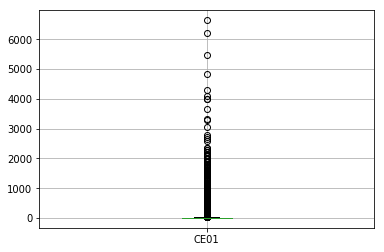

In [65]:
#are ther any interesting outliers?
df_ny.boxplot('CE01')
#Number of jobs with earnings $1250/month or less 

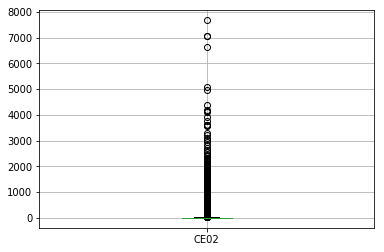

In [66]:
df_ny.boxplot('CE02')
#there are three outliers (Number of jobs with earnings $1251/month to $3333/month )

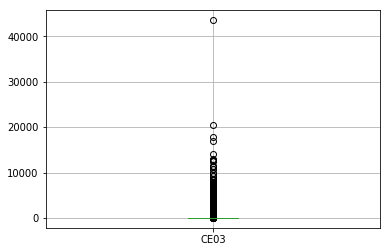

In [64]:
df_ny.boxplot('CE03')
#within the third group/variable there is one outlier (Number of jobs with earnings greater than $3333/month )

In [ ]:
#df_ny.plot(kind='bar')

In [ ]:
#df_ny.plot(kind='scatter')